# The Heat Equation

The one dimensional heat equation is the following,

\begin{equation}
\partial_tu(x,t) = \alpha \partial^2_x u(x,t),
\end{equation}

where $\alpha$ is a constant.

In [1]:
%matplotlib notebook
# import necessary packages
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj import Vector, Matrix, UGrid, ScalarField, LocalTaylorInterpolator
from etraj import BoundaryCondition, BoundaryConditionType
import etraj

ImportError: /home/ncarrara/bin/anaconda3/envs/pydev/lib/python3.8/site-packages/etraj-0.1-py3.8-linux-x86_64.egg/etraj.cpython-38-x86_64-linux-gnu.so: undefined symbol: _ZNK2ET6VectorIdE9removeValEm

In [2]:
# create the microstates
N = 1000
left = 0.0
right = 10.0
x = np.random.uniform(left,right,N)
x = np.asarray(sorted(x))
x_grid = [[x[i]] for i in range(len(x))]
# create the grid
g = UGrid(x_grid)

NameError: name 'UGrid' is not defined

In [3]:
# create a scalar field which is a Gaussian centered at mu = 5.0
mu = 5.0
k = 10
n = 10
f = (1/np.sqrt(2*np.pi))*np.exp(-.5*(x - mu)**2)+.5

s = ScalarField(Grid=g,field=f,log=g.log)

# incorporate the boundary conditions
l_boundary = BoundaryCondition(BoundaryConditionType.dirichlet,.5,0,0)
r_boundary = BoundaryCondition(BoundaryConditionType.dirichlet,.5,N-1,0)

s.add_boundary_condition(l_boundary)
s.add_boundary_condition(r_boundary)

# doing the heat eq. by hand
lte = LocalTaylorInterpolator(g)
s.set_Interpolator(lte)

<IPython.core.display.Javascript object>


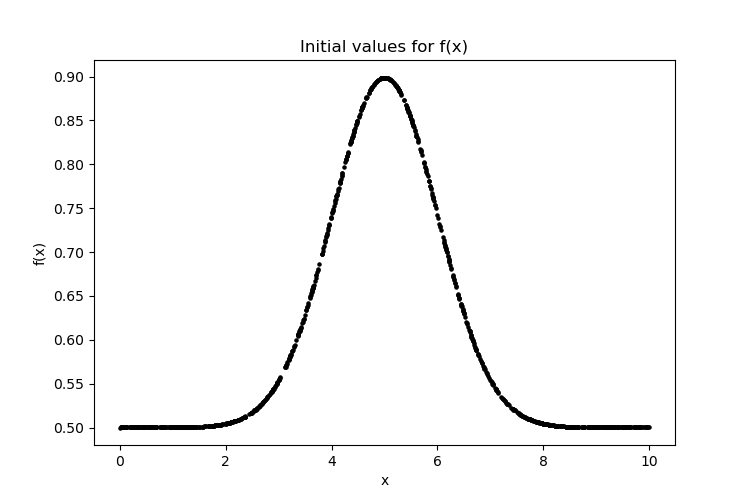

In [4]:
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5),num='Heat equation fig. 1')
axs.scatter(x,f,color='k',s=5)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("Initial values for f(x)")
plt.show()

<IPython.core.display.Javascript object>


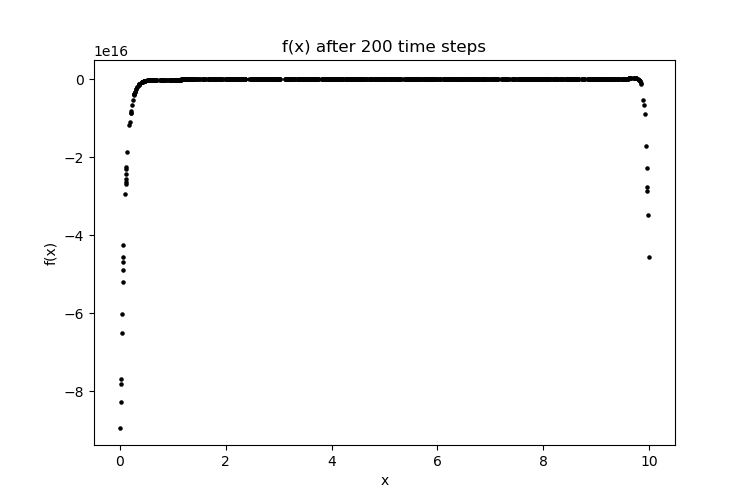

In [6]:
step_size = 0.001
time_steps = 200

order = 100

point = [mu]
for i in range(time_steps):
    LTI = etraj.create_local_taylor_interpolant(s,point,order)
    old_f = s.get_field()
    d2f_dx2 = LTI.dd(x_grid)
    new_f = [old_f[j] + step_size*d2f_dx2[j] for j in range(len(f))]
    s.set_field(new_f)
    
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5),num='Heat equation fig. 2')
axs.scatter(x,s.get_field(),color='k',s=5)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) after %s time steps" % time_steps)
plt.show()